In [67]:
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v2.0/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)

In [68]:
credentials = {}
credentials['name'] = 'babyname'
credentials['auth_url'] = 'https://identity.open.softlayer.com'
credentials['project_id'] = 'd52e3ad444ef41fbb722ea38367545f3'
credentials['region'] = 'dallas'
credentials['user_id'] = '9d5332bf2ad04b84955ff96edc89e828'
credentials['password'] = 't~N.j[SKL1=qN(b3'

In [69]:
set_hadoop_config(credentials)

In [70]:
name = sc.textFile("swift://notebooks.babyname/name.csv")

In [72]:
print "Total records in the name.csv dataset:", name.count()

Total records in the name.csv dataset: 2088


In [73]:
print "The first row in the name.csv dataset:", name.first()

The first row in the name.csv dataset: NAME,2014,2013,GENDER


In [74]:
nameParse = name.map(lambda line : line.split(","))

In [75]:
nameParse.first()

[u'NAME', u'2014', u'2013', u'GENDER']

In [76]:
nameParse.first()[0]

u'NAME'

In [77]:
nameParse.first()[2]

u'2013'

In [78]:
boyname = nameParse.filter(lambda x: x[3] == "M")

In [79]:
boyname.first()

[u'Bode', u'783', u'1428', u'M']

In [80]:
girlname = nameParse.filter(lambda x: x[3] == "W")

In [81]:
girlname.first()

[u'Aranza', u'607', u'4232', u'W']

In [82]:
boypredict = boyname.map(lambda p: (p[0], int((int(p[1]) + int(p[2])) / 2)) )

In [83]:
boypredict.first()

(u'Bode', 1105)

In [84]:
ppTop10=[]
nameTop10=[]
for pair in boypredict.map(lambda (x,y) : (y,x)).takeOrdered(10):
    ppTop10.append(pair[0])
    nameTop10.append(pair[1])
    print "Boyname %s has popularities of %f in 2016" % (pair[1],pair[0])

Boyname Noah has popularities of 1.000000 in 2016
Boyname Liam has popularities of 2.000000 in 2016
Boyname Jacob has popularities of 3.000000 in 2016
Boyname Mason has popularities of 3.000000 in 2016
Boyname William has popularities of 5.000000 in 2016
Boyname Ethan has popularities of 6.000000 in 2016
Boyname Michael has popularities of 7.000000 in 2016
Boyname Alexander has popularities of 8.000000 in 2016
Boyname Daniel has popularities of 10.000000 in 2016
Boyname Elijah has popularities of 11.000000 in 2016


In [85]:
drawppTop10=[]
for k in ppTop10:
    drawppTop10.append(int(11 - k))

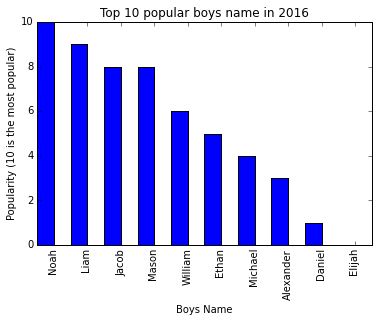

In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, drawppTop10, bar_width,
                 color='b')
plt.xlabel('Boys Name')
plt.ylabel('Popularity (10 is the most popular)')
plt.title('Top 10 popular boys name in 2016')
plt.xticks(index + bar_width, nameTop10, rotation=90)
plt.show()

In [87]:
girlpredict = girlname.map(lambda p: (p[0], int((int(p[1]) + int(p[2])) / 2)) )

In [88]:
girlpredict.first()

(u'Aranza', 2419)

In [89]:
gppTop10=[]
gnameTop10=[]
for pair in girlpredict.map(lambda (x,y) : (y,x)).takeOrdered(10):
    gppTop10.append(pair[0])
    gnameTop10.append(pair[1])
    print "Girlname %s has popularities of %f in 2016" % (pair[1],pair[0])

Girlname Emma has popularities of 1.000000 in 2016
Girlname Olivia has popularities of 2.000000 in 2016
Girlname Sophia has popularities of 2.000000 in 2016
Girlname Isabella has popularities of 4.000000 in 2016
Girlname Ava has popularities of 5.000000 in 2016
Girlname Mia has popularities of 6.000000 in 2016
Girlname Emily has popularities of 7.000000 in 2016
Girlname Abigail has popularities of 8.000000 in 2016
Girlname Madison has popularities of 9.000000 in 2016
Girlname Charlotte has popularities of 10.000000 in 2016


In [90]:
drawgppTop10=[]
for k in gppTop10:
    drawgppTop10.append(int(11 - k))

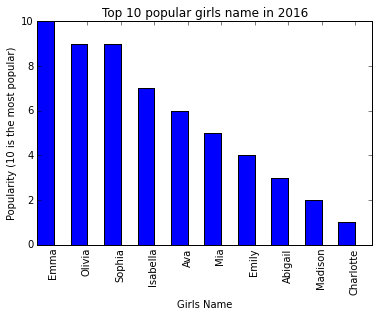

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, drawgppTop10, bar_width,
                 color='b')
plt.xlabel('Girls Name')
plt.ylabel('Popularity (10 is the most popular)')
plt.title('Top 10 popular girls name in 2016')
plt.xticks(index + bar_width, gnameTop10, rotation=90)
plt.show()